In [46]:
import re

def extract_acc_values(file_path):
    acc_dict = {}
    
    with open(file_path, 'r') as file:
        for line in file:
            match = re.search(r'INFO: data type: (\w+)\s+Acc: (\d+\.\d+)', line)
            if match:
                key = match.group(1)
                acc_value = float(match.group(2))
                if key not in acc_dict:
                    acc_dict[key] = []
                acc_dict[key].append(acc_value)
    
    return acc_dict


path=r'/home/zhiqin/data/LLM/LLM_new/data_complexity_epoch_207_data_90w_warmup_normal_init_34_wrong_43_unseen_diff_ini/GPT_normal_init_diff_lr_5e-4_composition_task_34_unseen_43_unseen_random_num_1_diff_ini_0.8_optim_multiplier_10.0'

# seed_lst=[1,2,3,4,5,6,7,8, 9]
# seed_lst=[1,5,7,8,9]
acc_dict_all=[]

for seed in seed_lst:
    path_seed=r'composition_random-N_100000-2L1H_seed%s/train_log.log'%(seed)
    acc_dict = extract_acc_values(path+'/'+path_seed)
    acc_dict_all.append(acc_dict)



In [47]:
import numpy as np

index_dict={}


for key in acc_dict_all[0].keys():
    if 'xel' not in key:
        continue

    index_seed=[]   

    for seed in range(len(seed_lst)):
        acc=acc_dict_all[seed][key]
        acc=np.array(acc)
        index=np.where(acc>0.99)
        index_seed.append(index[0][0])
    index_dict[key]=[np.mean(index_seed,axis=0),np.std(index_seed,axis=0)]

In [48]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np


def format_settings(
        wspace=0.25, 
        hspace=0.4, 
        left=0.12, 
        right=0.9, 
        bottom=0.15, 
        top=0.95,
        fs=12,
        dpi=300,
        lw=1.5,
        ms=5,
        axlw=1.5,
        major_tick_len=5,
        ):
    plt.rcParams['lines.linewidth'] = lw
    

    plt.rcParams['lines.markersize'] = ms

    plt.subplots_adjust(wspace=wspace, hspace=hspace, left=left, right=right, bottom=bottom, top=top)


    plt.rcParams['font.size'] = fs
    plt.rcParams['axes.labelsize'] = fs
    plt.rcParams['axes.titlesize'] = fs
    plt.rcParams['xtick.labelsize'] =fs
    plt.rcParams['ytick.labelsize'] = fs
    plt.rcParams['legend.fontsize'] = fs

    plt.rcParams['axes.linewidth'] = axlw

    plt.rcParams['xtick.major.width'] = axlw
    plt.rcParams['ytick.major.width'] = axlw

    plt.rcParams['xtick.major.size'] = major_tick_len
    plt.rcParams['ytick.major.size'] = major_tick_len

    plt.rcParams['xtick.minor.size'] = 0
    plt.rcParams['ytick.minor.size'] = 0

    plt.rcParams['xtick.major.pad'] = major_tick_len
    plt.rcParams['ytick.major.pad'] = major_tick_len

    plt.rcParams['xtick.minor.pad'] = 5
    plt.rcParams['ytick.minor.pad'] = 5

    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'

    plt.rcParams['xtick.top'] = False 
    plt.rcParams['ytick.right'] = False

    plt.rcParams['xtick.minor.visible'] = False
    plt.rcParams['ytick.minor.visible'] = False

    plt.rcParams['legend.frameon'] = False

    plt.rcParams['figure.dpi'] = dpi

    plt.rcParams['savefig.dpi'] = dpi



def get_color_list(n_colors, cmap='viridis', color_min=0.5, color_max=1, invert=False):

    colormap = plt.cm.get_cmap(cmap)
    if invert:
        color_list = [colormap(i) for i in np.linspace(color_max, color_min, n_colors)]
    else:
        color_list = [colormap(i) for i in np.linspace(color_min, color_max, n_colors)]
    return color_list


def get_color_groups(n_group, n_colors, cmap_list=None, color_min=0.5, color_max=1, invert=False):

    if cmap_list is None:
        cmap_list = ['Blues', 'Reds', 'Greens', 'Oranges', 'Greys', 'Purples', 'YlOrBr', 'PuBuGn', 'BuPu']
        
    color_groups = [get_color_list(n_colors, cmap=cmap_list[i], color_min=color_min, color_max=color_max, invert=invert) for i in range(n_group)]
    
    return color_groups


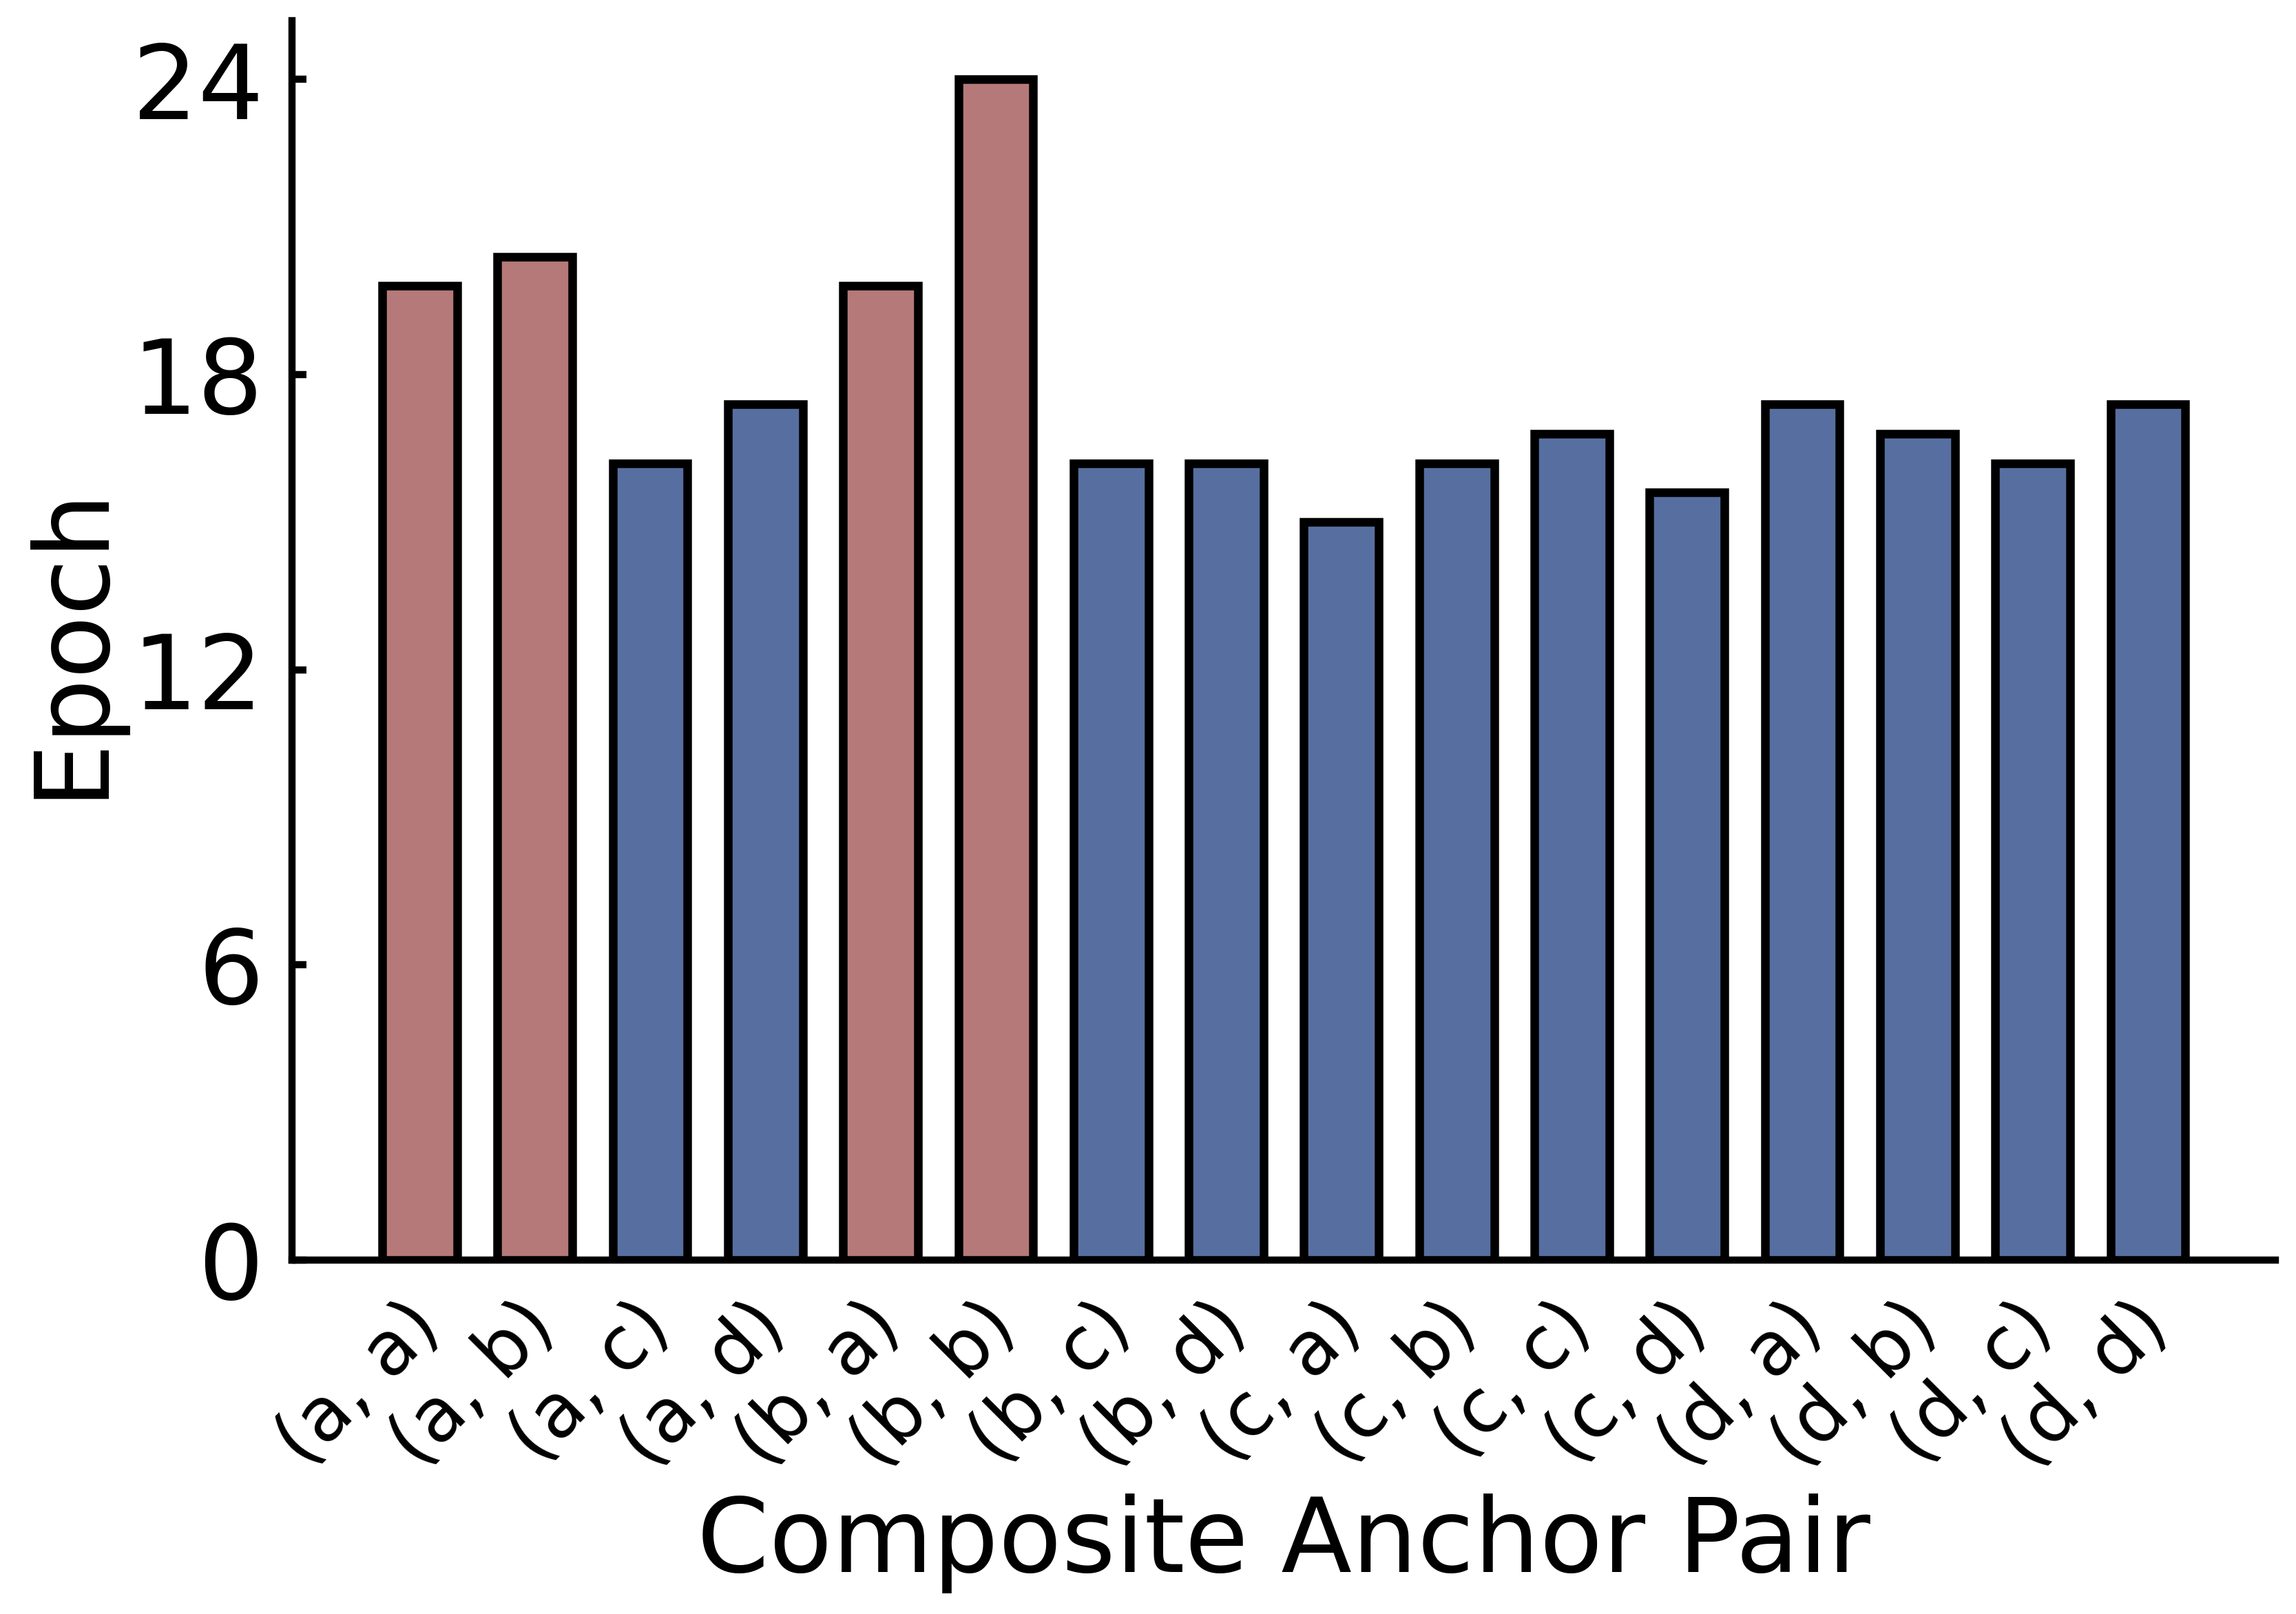

In [51]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
format_settings(wspace=0.4, hspace=0.6, left=0.15,right=0.95,bottom=0.2, fs=36, lw=6, ms=12.5, axlw=2.5)
# color_list = [(68/255, 144/255, 196/255), (255/255, 102/255, 100/255), (30/255, 128/255, 184/255)]
# color_list=['#a7b9d7', '#dea3a2']
edgecolor_list=['#576fa0','#b57979']
color_list=['#576fa0','#b57979']
plt.rcParams['xtick.major.pad'] = 10
plt.rcParams['ytick.major.pad'] = 5

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

ax = plt.gca()
labels = ['(1, 1)', '(1, 2)', '(1, 3)', '(1, 4)', '(2, 1)', '(2, 2)', '(2, 3)', '(2, 4)', '(3, 1)', '(3, 2)', '(3, 3)', '(3, 4)', '(4, 1)', '(4, 2)', '(4, 3)', '(4, 4)']
label_name=['(a, a)', '(a, b)', '(a, c)', '(a, d)', '(b, a)', '(b, b)', '(b, c)', '(b, d)', '(c, a)', '(c, b)', '(c, c)', '(c, d)', '(d, a)', '(d, b)', '(d, c)', '(d, d)']
for i, label in enumerate(labels):
    key = f'{label[1]}{label[4]}_xel'
    if key in ['12_xel', '21_xel', '11_xel', '22_xel']:
        color = color_list[1]
        edgecolor=edgecolor_list[1]
    else:
        color = color_list[0]
        edgecolor=edgecolor_list[0]
    
    plt.bar(i+1, index_dict[key][0], color=color, edgecolor='black', linewidth=3, width=0.65)
# ax.yaxis.grid(True, linestyle='--', linewidth=1.7, color='gray', alpha=0.7)
# ax.set_axisbelow(True)
plt.xticks(np.arange(1.3, 17.3), label_name,ha='right', va='top', rotation=45, fontsize=26)
plt.tick_params(axis='x', which='both', length=0) 
plt.yticks(np.arange(0, 9, 2), np.arange(0, 27, 6))
ax.tick_params(axis='x', which='major', pad=10)
ax.tick_params(axis='y', which='major', pad=10)
plt.xlabel('Composite Anchor Pair')
plt.ylabel('Epoch')
plt.savefig('/home/zhiqin/LLM_from_4090/plot_fot_pami/pic/data_complex_composite_anchor_pair_epoch.png', dpi=300)